# Ashrut Alok Arora
# 210968206
# Week 7

## Import Necessary Libraries

In [30]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

## Import the Dataset

In [31]:
df = pd.read_csv("IMDB Dataset.csv")

#### Seeing the data

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Shape of data

In [7]:
print("Shape of Data =", df.shape)

Shape of Data = (50000, 2)


In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Data Preprocessing

### 1) Lower Case the data

In [10]:
df['review'] = df['review'].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


### 2) Remove Punctuation

In [11]:
import string

df['review'] = df['review'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


### 3) Remove URLs

In [12]:
import re
url_pattern = r'https?://\S+|www\.\S+'

def remove_urls(text):
    return re.sub(url_pattern, '', text)

df['review'] = df['review'].apply(remove_urls)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


### 4) Remove Stop Words 

In [ ]:
def remove_stop_words(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    processed_text = ' '.join(filtered_tokens)

    return processed_text

# Create a list to store the processed reviews
processed_reviews = []

# Iterate through the rows of the DataFrame and process each review
for i, row in df.iterrows():
    print(f"Processing sample {i + 1}...")
    processed_review = remove_stop_words(row['review'])
    processed_reviews.append(processed_review)
    print(f"Sample {i + 1} done.")

# Update the 'review' column with the processed data
df['review'] = processed_reviews

### 5) Creating a list of reviews

In [25]:
reviews = df['review'].tolist()

### 6) Tokenize 

In [26]:
from keras.preprocessing.text import Tokenizer


max_words = 10000  # Define the maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")#out-of-vocabulary (OOV) tokens
tokenizer.fit_on_texts(reviews)  # generates token of words
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size of dataset

2023-10-16 10:50:34.352219: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-16 10:50:34.377620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 10:50:34.859349: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [27]:
# Encode the Words
sequences = tokenizer.texts_to_sequences(reviews)

# Encode the Labels
labels= pd.get_dummies(df['sentiment']).values

### Lemmatizing

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ if token.lemma_ != "-PRON-" else token.text for token in doc])
    return lemmatized_text

# Assuming you have a list of text data named 'reviews'
lemmatized_reviews = []

# Iterate through the reviews and lemmatize each one
for i, review in enumerate(reviews):
    print(f"Processing sample {i + 1}...")
    lemmatized_review = lemmatize_text(review)
    lemmatized_reviews.append(lemmatized_review)
    print(f"Sample {i + 1} done.")

# Now you have a list of lemmatized reviews

Processing sample 1...
Sample 1 done.
Processing sample 2...
Sample 2 done.
Processing sample 3...
Sample 3 done.
Processing sample 4...
Sample 4 done.
Processing sample 5...
Sample 5 done.
Processing sample 6...
Sample 6 done.
Processing sample 7...
Sample 7 done.
Processing sample 8...
Sample 8 done.
Processing sample 9...
Sample 9 done.
Processing sample 10...
Sample 10 done.
Processing sample 11...
Sample 11 done.
Processing sample 12...
Sample 12 done.
Processing sample 13...
Sample 13 done.
Processing sample 14...
Sample 14 done.
Processing sample 15...
Sample 15 done.
Processing sample 16...
Sample 16 done.
Processing sample 17...
Sample 17 done.
Processing sample 18...
Sample 18 done.
Processing sample 19...
Sample 19 done.
Processing sample 20...
Sample 20 done.
Processing sample 21...
Sample 21 done.
Processing sample 22...
Sample 22 done.
Processing sample 23...
Sample 23 done.
Processing sample 24...
Sample 24 done.
Processing sample 25...
Sample 25 done.
Processing sample 

## Visualizing the Most Frequent Words & bigrams

[nltk_data] Downloading package punkt to /home/mca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


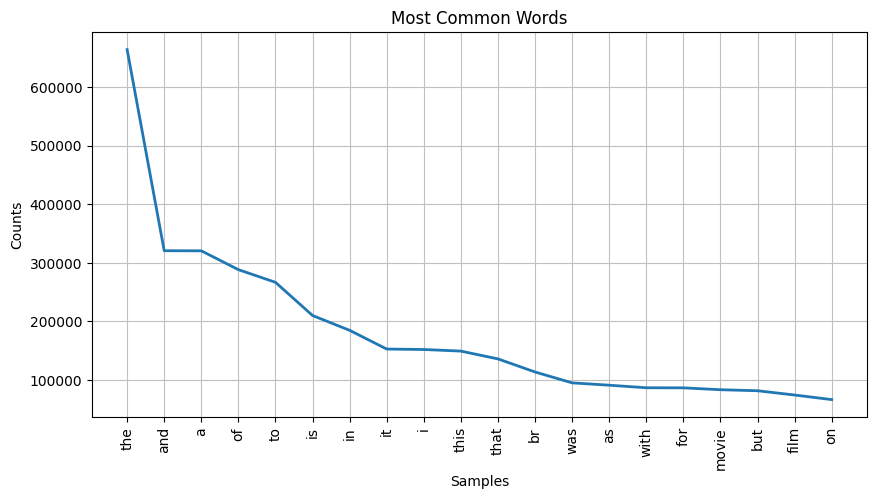

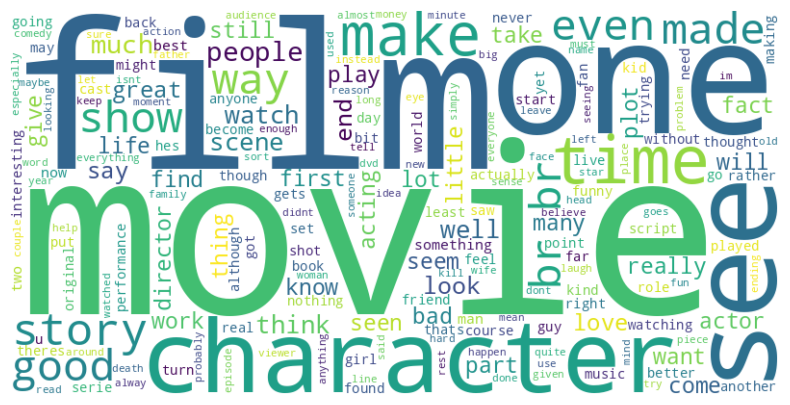

In [34]:
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Tokenize sentences into words
words = [word for review in reviews for word in nltk.word_tokenize(review)]

# Calculate word frequency
word_frequency = FreqDist(words)

# Plot the most common words
plt.figure(figsize=(10, 5))
word_frequency.plot(20, title='Most Common Words', cumulative=False)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Viz Positive and Negative Sentiments

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [37]:
positive_reviews = df[df['sentiment'] == 'positive']['review'].tolist()
negative_reviews = df[df['sentiment'] == 'negative']['review'].tolist()

In [38]:
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return " ".join(words)

positive_reviews = [preprocess_text(review) for review in positive_reviews]
negative_reviews = [preprocess_text(review) for review in negative_reviews]

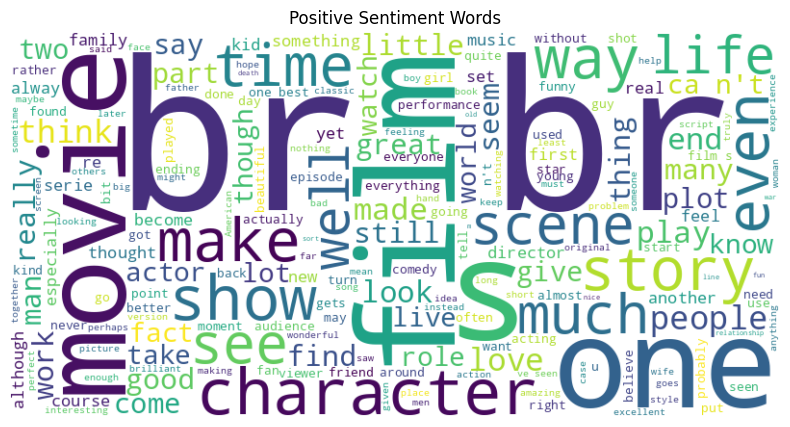

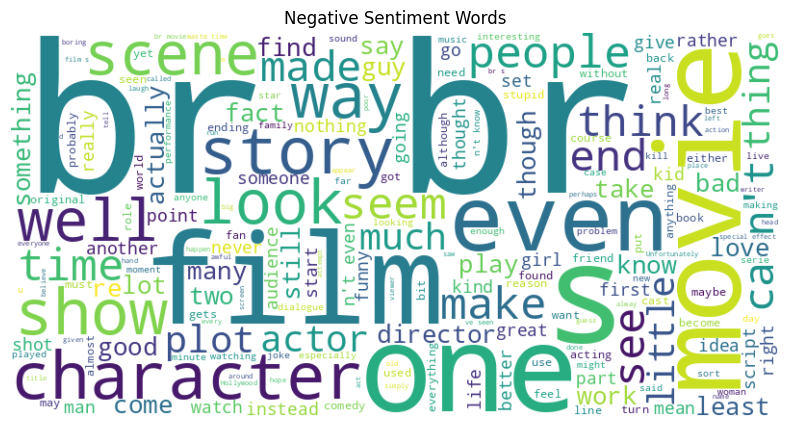

In [39]:
def create_word_cloud(reviews, title):
    text = " ".join(reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

create_word_cloud(positive_reviews, "Positive Sentiment Words")
create_word_cloud(negative_reviews, "Negative Sentiment Words")

### 7) Analyze Review Length

In [40]:
from keras.preprocessing.sequence import pad_sequences

# Define your desired maximum review length
max_review_length = 200

# Pad the sequences
sequences = pad_sequences(sequences, maxlen=max_review_length, padding='post', truncating='post')

# Calculate the lengths of the sequences after padding
review_lengths = [len(seq) for seq in sequences]
print(review_lengths)

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,

## Splitting the Data into Train Test and Validation

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## LSTM

### Building the Model 

In [42]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Create a Sequential model
lstm = Sequential()

# Add layers to the model
lstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
lstm.add(LSTM(128, return_sequences=True))
lstm.add(LSTM(128))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dropout(0.5))
lstm.add(Dense(2, activation='sigmoid'))

2023-10-16 11:16:03.703941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-16 11:16:03.705263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-16 11:16:03.705354: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [43]:
lstm.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          23389568  
                                                                 
 lstm (LSTM)                 (None, 200, 128)          131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 23661122 (90.26 MB)
Trainable params: 2366

In [55]:
batch_size = 32
lstm_hist = lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 41s 33ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 2/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 3/10
1250/1250 [==============================] - 41s 33ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 4/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 5/10
1250/1250 [==============================] - 42s 33ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 6/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 7/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6932 -

In [88]:
lstm.save('lstm.keras')

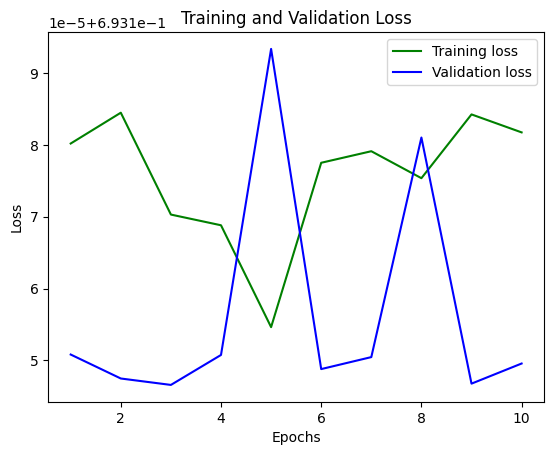

In [56]:
import matplotlib.pyplot as plt

# Access training and validation loss from the history
train_loss = lstm_hist.history['loss']
val_loss = lstm_hist.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing the Model

In [57]:
test_loss, test_accuracy = lstm.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 2s 14ms/step - loss: 0.6932 - accuracy: 0.4924
Test Loss: 0.6932, Test Accuracy: 0.4924


### Prediction using the Model

In [64]:
import numpy as np
# Example of making predictions on user-generated data:
user_reviews = ["Movie was very bad. I didn't like it."]

user_sequences = tokenizer.texts_to_sequences(user_reviews)
user_sequences = pad_sequences(user_sequences, maxlen=max_review_length, padding='post', truncating='post')
user_predictions = lstm.predict(user_sequences)
#print(user_predictions)
if (np.argmax(user_predictions) >= 0.3):
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 [==============================] - 0s 15ms/step
Negative sentiment


In [65]:
import numpy as np

# Predicted probabilities
probabilities = np.array([0.5, 0.4])

# Set the threshold
threshold = 0.5

# Classify based on the threshold
predicted_class = 1 if probabilities[0] >= threshold else 0

# Determine the class label
class_label = 'positive' if predicted_class == 1 else 'negative'

print("Predicted probabilities:", probabilities)
print("Predicted class:", class_label)

Predicted probabilities: [0.5 0.4]
Predicted class: positive


## GRU

In [66]:
gru = Sequential()
gru.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
gru.add(LSTM(128, return_sequences=True))
gru.add(LSTM(128))
gru.add(Dense(64, activation='relu'))
gru.add(Dropout(0.5))
gru.add(Dense(2, activation='sigmoid'))

gru.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(gru.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          23389568  
                                                                 
 lstm_4 (LSTM)               (None, 200, 128)          131584    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 23661122 (90.26 MB)
Trainable params: 23

In [67]:
batch_size = 32
gru_hist = gru.fit(X_train, y_train, epochs = 7, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/7
1250/1250 [==============================] - 59s 46ms/step - loss: 0.6924 - accuracy: 0.5122 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 2/7
1250/1250 [==============================] - 43s 34ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 3/7
1250/1250 [==============================] - 42s 33ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 4/7
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 5/7
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 6/7
1250/1250 [==============================] - 40s 32ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 7/7
1250/1250 [==============================] - 38s 30ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6932 - val_ac

In [87]:
gru.save('gru.keras')

### Viz loss curves

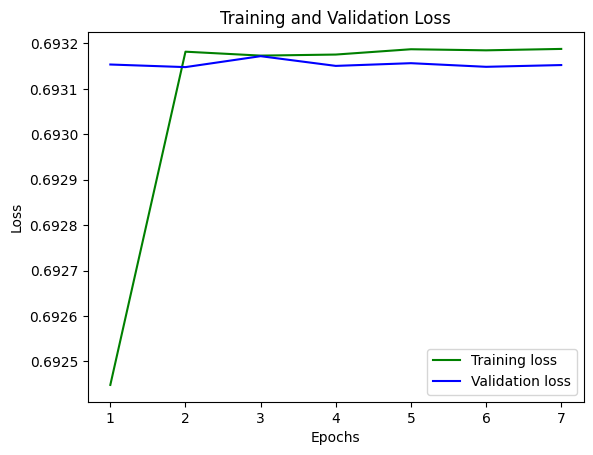

In [68]:
import matplotlib.pyplot as plt

# Access training and validation loss from the history
train_loss = gru_hist.history['loss']
val_loss = gru_hist.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing the Model

In [69]:
test_loss, test_accuracy = gru.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 2s 15ms/step - loss: 0.6932 - accuracy: 0.4924
Test Loss: 0.6932, Test Accuracy: 0.4924


### Prediction

In [70]:
# Example of making predictions on user-generated data:
user_reviews = ["I love you so much"]

user_sequences = tokenizer.texts_to_sequences(user_reviews)
user_sequences = pad_sequences(user_sequences, maxlen=max_review_length, padding='post', truncating='post')
user_predictions = gru.predict(user_sequences)
#print(user_predictions)
if (np.argmax(user_predictions) >= 0.3):
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 [==============================] - 0s 322ms/step
Negative sentiment


## Bi-Directional RNN

In [71]:
bdrnn = Sequential()
bdrnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
bdrnn.add(Bidirectional(LSTM(64, return_sequences=True),  merge_mode='concat'))
bdrnn.add(Bidirectional(LSTM(64, return_sequences=True),  merge_mode='concat')) 
bdrnn.add(Bidirectional(LSTM(64), merge_mode='concat'))  
bdrnn.add(Dense(2, activation='sigmoid'))

bdrnn.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(bdrnn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          23389568  
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                      

In [72]:
batch_size = 32
bdrnn_hist = bdrnn.fit(X_train, y_train, epochs = 7, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/7
1250/1250 [==============================] - 79s 60ms/step - loss: 0.4580 - accuracy: 0.7885 - val_loss: 0.3724 - val_accuracy: 0.8478
Epoch 2/7
1250/1250 [==============================] - 64s 51ms/step - loss: 0.3187 - accuracy: 0.8679 - val_loss: 0.3095 - val_accuracy: 0.8664
Epoch 3/7
1250/1250 [==============================] - 69s 55ms/step - loss: 0.2608 - accuracy: 0.8965 - val_loss: 0.3012 - val_accuracy: 0.8716
Epoch 4/7
1250/1250 [==============================] - 68s 55ms/step - loss: 0.2231 - accuracy: 0.9143 - val_loss: 0.3174 - val_accuracy: 0.8726
Epoch 5/7
1250/1250 [==============================] - 68s 55ms/step - loss: 0.1878 - accuracy: 0.9306 - val_loss: 0.3032 - val_accuracy: 0.8728
Epoch 6/7
1250/1250 [==============================] - 70s 56ms/step - loss: 0.1627 - accuracy: 0.9408 - val_loss: 0.3241 - val_accuracy: 0.8800
Epoch 7/7
1250/1250 [==============================] - 65s 52ms/step - loss: 0.1317 - accuracy: 0.9561 - val_loss: 0.3645 - val_ac

In [86]:
bdrnn.save('bdrnn.keras')

### Viz Loss curves

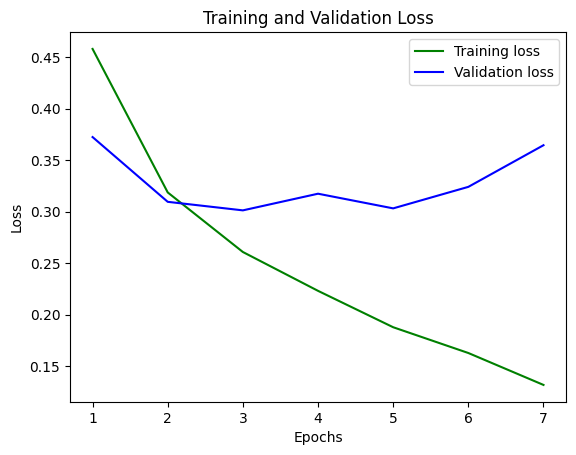

In [75]:
import matplotlib.pyplot as plt

# Access training and validation loss from the history
train_loss = bdrnn_hist.history['loss']
val_loss = bdrnn_hist.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing the Model

In [76]:
test_loss, test_accuracy = bdrnn.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 4s 25ms/step - loss: 0.3953 - accuracy: 0.8626
Test Loss: 0.3953, Test Accuracy: 0.8626


### Prediction

In [79]:
# Example of making predictions on user-generated data:
user_reviews = ["I love you"]

user_sequences = tokenizer.texts_to_sequences(user_reviews)
user_sequences = pad_sequences(user_sequences, maxlen=max_review_length, padding='post', truncating='post')
user_predictions = bdrnn.predict(user_sequences)
#print(user_predictions)
print(user_reviews)
if (np.argmax(user_predictions) >= 0.3):
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 [==============================] - 0s 19ms/step
['I love you']
Negative sentiment


## 10 Random Reviews Dataset

In [94]:
import random

random.seed(52)
num_reviews_to_select = 10

# Randomly select 10 movie reviews
selected_reviews = random.sample(df['review'].tolist(), num_reviews_to_select)

# Create a DataFrame for your test dataset
test_data = pd.DataFrame({'review': selected_reviews})

# Include sentiments in the test dataset if available
test_sentiments = df[df['review'].isin(selected_reviews)]['sentiment']
test_data['sentiment'] = test_sentiments.tolist()

In [95]:
test_data

,review,sentiment
0,I bellied up to the bar expecting this to be a...,positive
1,"as a 'physically challenged' person (god, how ...",positive
2,"The 40 Year Old Virgin, is about Andy Stitzer,...",positive
3,First off there is nothing wrong with studying...,positive
4,This movie sucks so bad. Its funny to see what...,positive
5,I wasted my time and gave this show a chance. ...,negative
6,"Three girls (an all-female media-crew, includi...",positive
7,"Although it isn't mentioned very often, ""Don't...",negative
8,I hadn't laughed this hard for a movie in a re...,negative
9,The Straight Story is a multilevel exploration...,positive


In [96]:
import numpy as np

# Tokenize and pad the test reviews
test_sequences = tokenizer.texts_to_sequences(test_dataset['review'])
test_sequences = pad_sequences(test_sequences, maxlen=max_review_length, padding='post', truncating='post')

# Define the classification threshold
threshold = 0.3  # You can adjust this value

# Create a list of models and their names
models = [
    ('LSTM', lstm),
    ('GRU', gru),
    ('BDRNN', bdrnn)
]  # Assuming you have already defined and trained these models

# Create a dictionary to store accuracy for each model
accuracy_dict = {}

# Map sentiment labels to numeric values
sentiment_mapping = {'positive': 1, 'negative': 0}

# Loop through the models and make predictions and calculate accuracy
for model_name, model in models:
    test_predictions = model.predict(test_sequences)

    correct_predictions = 0
    total_predictions = len(test_predictions)

    print(f"Model: {model_name}\n")
    for i, prediction in enumerate(test_predictions):
        predicted_sentiment = np.argmax(prediction) >= threshold  # 1 if positive, 0 if negative
        actual_sentiment = sentiment_mapping[test_data['sentiment'].iloc[i]]

        sentiment = "Positive" if predicted_sentiment else "Negative"
        
        review = test_dataset['review'].iloc[i]
        
        print(f"Review {i + 1}: {sentiment} sentiment")
        # print("Review Text:")
        # print(review)
        print(f"Predicted Sentiment: {sentiment}")
        print(f"Actual Sentiment: {'Positive' if actual_sentiment else 'Negative'}")
        print("-" * 40)

        if predicted_sentiment == actual_sentiment:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    accuracy_dict[model_name] = accuracy
    print(f"{model_name} Model Accuracy: {accuracy:.2f}%")
    print("\n" + "=" * 40 + "\n")


1/1 [==============================] - 0s 15ms/step
Model: LSTM

Review 1: Negative sentiment
Predicted Sentiment: Negative
Actual Sentiment: Positive
----------------------------------------
Review 2: Negative sentiment
Predicted Sentiment: Negative
Actual Sentiment: Positive
----------------------------------------
Review 3: Negative sentiment
Predicted Sentiment: Negative
Actual Sentiment: Positive
----------------------------------------
Review 4: Negative sentiment
Predicted Sentiment: Negative
Actual Sentiment: Positive
----------------------------------------
Review 5: Negative sentiment
Predicted Sentiment: Negative
Actual Sentiment: Positive
----------------------------------------
Review 6: Negative sentiment
Predicted Sentiment: Negative
Actual Sentiment: Negative
----------------------------------------
Review 7: Negative sentiment
Predicted Sentiment: Negative
Actual Sentiment: Positive
----------------------------------------
Review 8: Negative sentiment
Predicted Sentime